In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_colesterol = pd.read_csv('./datasets/colesterol.csv')

In [3]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [4]:
df_colesterol.describe()

,Id,Idade,Peso,Altura,Colesterol
count,1000.000000,997.000000,997.000000,997.000000,1000.000000
mean,500.500000,49.206620,76.496690,174.889669,199.453260
std,288.819436,17.476704,21.439132,8.844703,50.625152
min,1.000000,20.000000,15.400000,160.000000,36.260000
25%,250.750000,34.000000,61.700000,167.000000,166.345000
50%,500.500000,49.000000,75.500000,175.000000,199.455000
75%,750.250000,65.000000,90.200000,183.000000,233.785000
max,1000.000000,79.000000,158.100000,190.000000,372.670000


In [5]:
df_colesterol.drop(columns=['Id'], axis=1, inplace=True)

In [6]:
df_colesterol.head(10)

,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [7]:
df_colesterol.columns = [
  'blood_type',
  'smoking',
  'physical_activity_degree',
  'age',
  'weight',
  'height',
  'colesterol_level'
]

In [8]:
df_colesterol.head(10)

,blood_type,smoking,physical_activity_degree,age,weight,height,colesterol_level
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [9]:
# Copiar dataframe para o EDA
df_colesterol_eda = df_colesterol.copy()

In [10]:
# Copiar dataframe para bucketing
df_colesterol_bucketing = df_colesterol.copy()

### EDA

In [11]:
df_colesterol_eda.blood_type.unique()

array(['B', 'A', 'O', 'AB', nan], dtype=object)

In [12]:
df_colesterol_eda.smoking.unique()

array(['Sim', 'Não', nan], dtype=object)

In [13]:
df_colesterol_eda.physical_activity_degree.unique()

array(['Baixo', 'Moderado', 'Alto', nan], dtype=object)

In [14]:
# Detectar valores ausentes
df_colesterol_eda.isna().sum()

blood_type                  4
smoking                     3
physical_activity_degree    4
age                         3
weight                      3
height                      3
colesterol_level            0
dtype: int64

In [15]:
# Olhar para as medidas estatísticas do dataframe, 
# a fim de decidir qual parâmetro utilizar para preencher nulos
df_colesterol_eda.describe()

,age,weight,height,colesterol_level
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


- age - mediana (média com valores fracionados, não adequado)
- weight - mediana (valores próximos, mas percebe-se outliers)
- height - mediana (valores muito próximos, e o número é inteiro em cm)
- Para variáveis categóricas, utilizar a moda

In [16]:
# Coletar modas das categóricas
mode_blood_type = df_colesterol_eda.blood_type.mode()[0]
mode_smoking = df_colesterol_eda.smoking.mode()[0]
mode_physical_act = df_colesterol_eda.physical_activity_degree.mode()[0]

In [17]:
# Coletar medianas das numéricas
median_age = df_colesterol_eda.age.median()
median_weight = df_colesterol_eda.weight.median()
median_height = df_colesterol_eda.height.median()

In [18]:
# Input de valores ausentes
df_colesterol_eda.fillna(value={
  'blood_type': mode_blood_type,
  'smoking': mode_smoking,
  'physical_activity_degree': mode_physical_act,
  'age': median_age,
  'weight': median_weight,
  'height': median_height
}, inplace=True)

In [19]:
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   blood_type                1000 non-null   object 
 1   smoking                   1000 non-null   object 
 2   physical_activity_degree  1000 non-null   object 
 3   age                       1000 non-null   float64
 4   weight                    1000 non-null   float64
 5   height                    1000 non-null   float64
 6   colesterol_level          1000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


In [20]:
# Converter idade e altura para inteiro
df_colesterol_eda.age = df_colesterol_eda.age.astype(int)
df_colesterol_eda.height = df_colesterol_eda.height.astype(int)

<Axes: xlabel='age'>

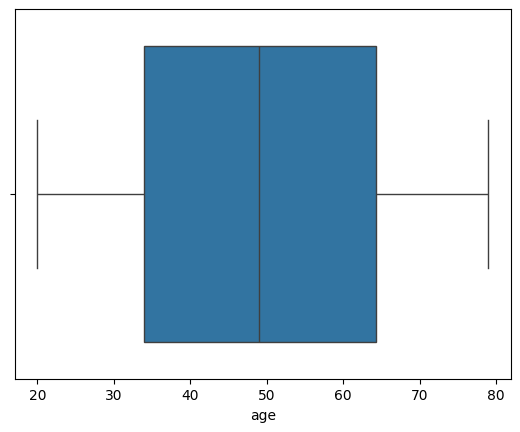

In [21]:
# Verificar outliers
sns.boxplot(data=df_colesterol_eda, x='age')

<Axes: xlabel='height'>

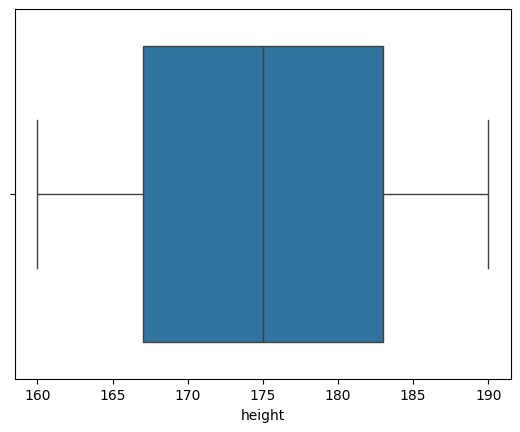

In [22]:
sns.boxplot(data=df_colesterol_eda, x='height')

<Axes: xlabel='weight'>

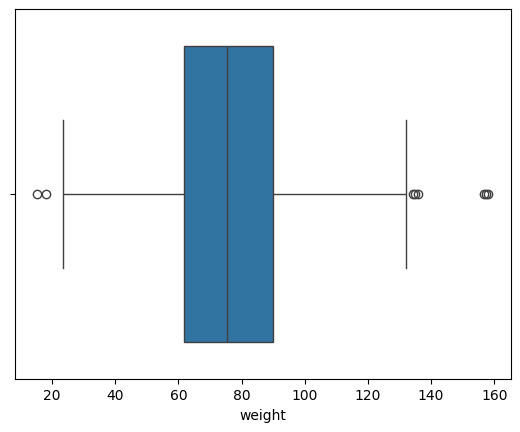

In [23]:
sns.boxplot(data=df_colesterol_eda, x='weight')

In [24]:
# Filtrar o público a ser removido
df_colesterol_eda[df_colesterol_eda.weight < 40].weight.count()

37

In [25]:
# Remover púbico do dataframe
df_colesterol_eda.drop(df_colesterol_eda[df_colesterol_eda.weight < 40].index, axis=0, inplace=True)

In [26]:
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   blood_type                963 non-null    object 
 1   smoking                   963 non-null    object 
 2   physical_activity_degree  963 non-null    object 
 3   age                       963 non-null    int32  
 4   weight                    963 non-null    float64
 5   height                    963 non-null    int32  
 6   colesterol_level          963 non-null    float64
dtypes: float64(2), int32(2), object(3)
memory usage: 52.7+ KB


<Axes: xlabel='weight'>

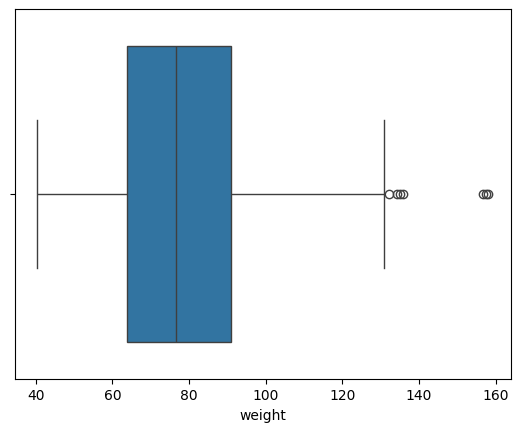

In [27]:
sns.boxplot(data=df_colesterol_eda, x='weight')

<Axes: xlabel='colesterol_level'>

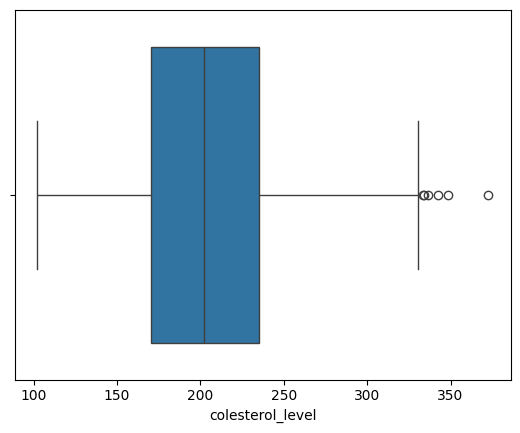

In [28]:
sns.boxplot(data=df_colesterol_eda, x='colesterol_level')

<Axes: xlabel='blood_type', ylabel='colesterol_level'>

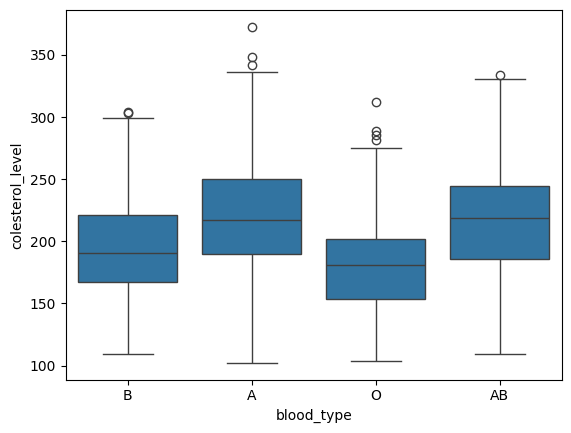

In [29]:
# Cruzamento de variáveis categóricas com o nível de colesterol
sns.boxplot(data=df_colesterol_eda, x='blood_type', y='colesterol_level')

<Axes: xlabel='physical_activity_degree', ylabel='colesterol_level'>

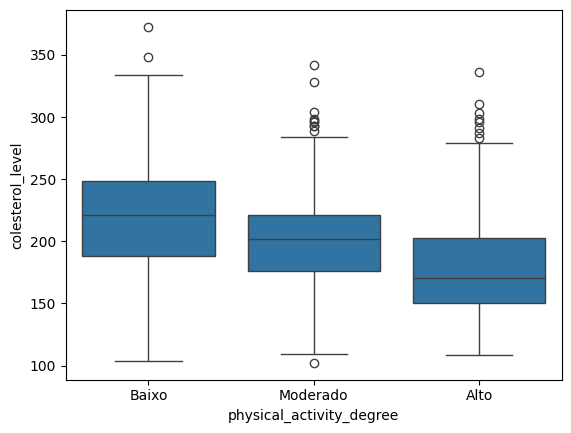

In [30]:
sns.boxplot(data=df_colesterol_eda, x='physical_activity_degree', y='colesterol_level')

<Axes: xlabel='smoking', ylabel='colesterol_level'>

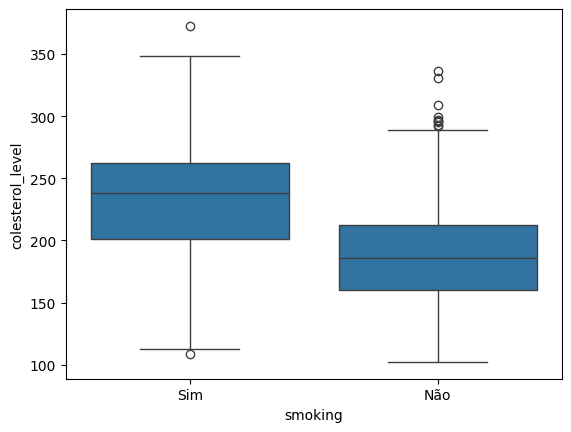

In [31]:
sns.boxplot(data=df_colesterol_eda, x='smoking', y='colesterol_level')

<Axes: xlabel='age', ylabel='colesterol_level'>

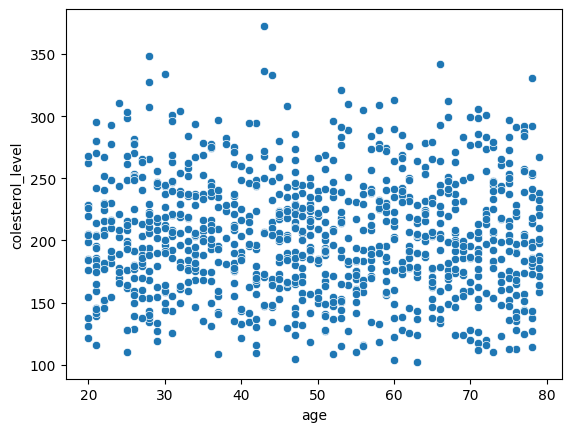

In [32]:
# Cruzamento das variáveis numericas com nível de colesterol
sns.scatterplot(data=df_colesterol_eda, x='age', y='colesterol_level')

<Axes: xlabel='weight', ylabel='colesterol_level'>

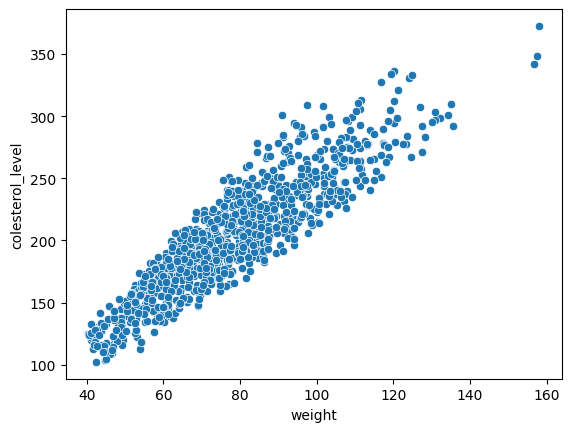

In [33]:
sns.scatterplot(data=df_colesterol_eda, x='weight', y='colesterol_level')

<Axes: xlabel='height', ylabel='colesterol_level'>

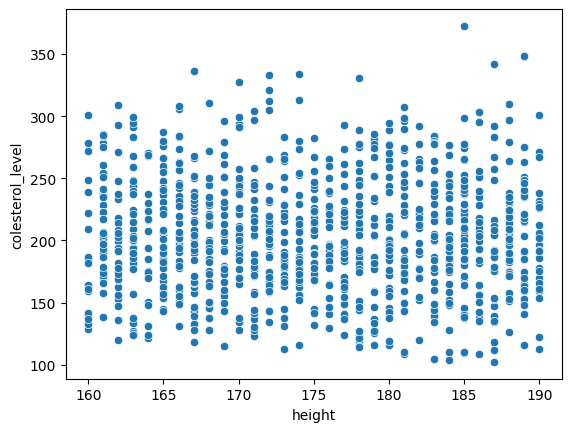

In [34]:
sns.scatterplot(data=df_colesterol_eda, x='height', y='colesterol_level')

- Verifica-se que há uma certa correlação entre valores de colesterol e valores de peso

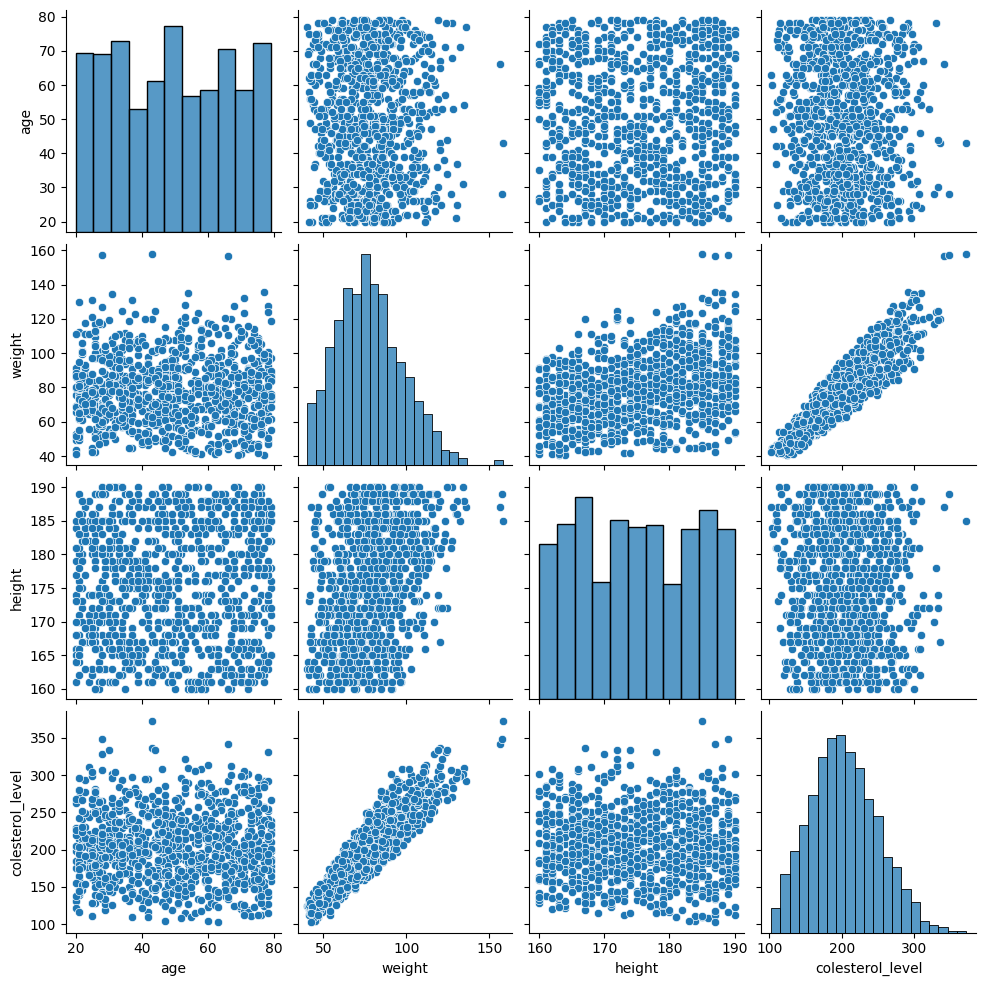

In [35]:
# Análise da distribuição das variáveis numéricas
sns.pairplot(data=df_colesterol_eda)

- Ajustar as variáveis categóricas para anáise de relação
  - Variáveis nominais: blood_type, smoking (não são quantificadas, apenas categorizam)
  - Variável ordinal: physical_activity_degree (baixo, moderado e alto)

In [36]:
# Converter nominais em numéricas, usando one-hot-encoding do pandas
df_colesterol_eda = pd.get_dummies(df_colesterol_eda, columns=['blood_type', 'smoking'], dtype=int)

In [37]:
df_colesterol_eda.head(10)

,physical_activity_degree,age,weight,height,colesterol_level,blood_type_A,blood_type_AB,blood_type_B,blood_type_O,smoking_Não,smoking_Sim
0,Baixo,33,85.1,186,199.63,0,0,1,0,0,1
1,Moderado,68,105.0,184,236.98,1,0,0,0,1,0
2,Alto,25,64.8,180,161.79,0,0,0,1,1,0
3,Alto,43,120.2,167,336.24,1,0,0,0,1,0
4,Baixo,79,88.5,175,226.23,0,1,0,0,1,0
5,Baixo,68,66.8,170,185.31,0,0,1,0,1,0
6,Baixo,60,117.3,181,289.33,1,0,0,0,0,1
7,Moderado,35,86.9,174,216.48,0,0,0,1,0,1
8,Baixo,62,81.3,166,235.30,0,0,0,1,1,0
10,Baixo,57,123.6,183,283.87,1,0,0,0,0,1


In [38]:
# Converter variável categórica ordinal em numérica usando o factorize do Pandas
df_colesterol_eda['physical_activity_degree'] = pd.factorize(df_colesterol_eda.physical_activity_degree)[0] + 1

In [39]:
df_colesterol_eda.head(10)

,physical_activity_degree,age,weight,height,colesterol_level,blood_type_A,blood_type_AB,blood_type_B,blood_type_O,smoking_Não,smoking_Sim
0,1,33,85.1,186,199.63,0,0,1,0,0,1
1,2,68,105.0,184,236.98,1,0,0,0,1,0
2,3,25,64.8,180,161.79,0,0,0,1,1,0
3,3,43,120.2,167,336.24,1,0,0,0,1,0
4,1,79,88.5,175,226.23,0,1,0,0,1,0
5,1,68,66.8,170,185.31,0,0,1,0,1,0
6,1,60,117.3,181,289.33,1,0,0,0,0,1
7,2,35,86.9,174,216.48,0,0,0,1,0,1
8,1,62,81.3,166,235.30,0,0,0,1,1,0
10,1,57,123.6,183,283.87,1,0,0,0,0,1


<Axes: >

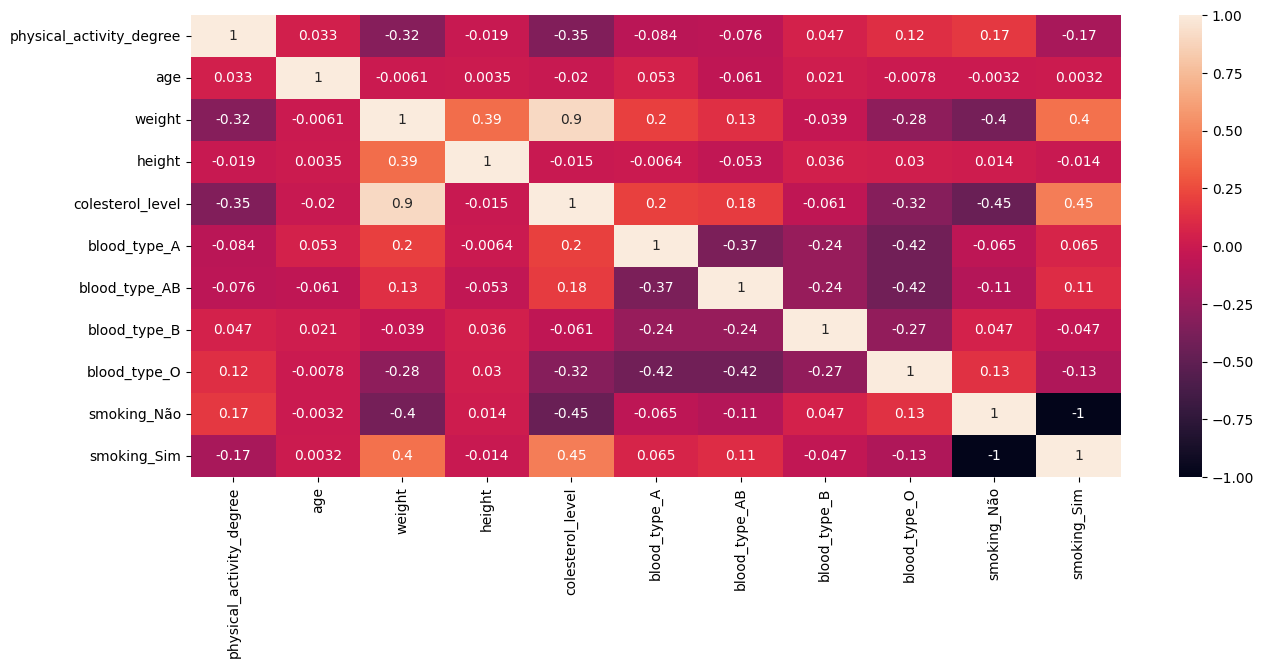

In [40]:
# Mapa de calor com correlação
plt.figure(figsize=(15,6))
sns.heatmap(df_colesterol_eda.corr(), annot=True, vmin=-1, vmax=1)

<Axes: >

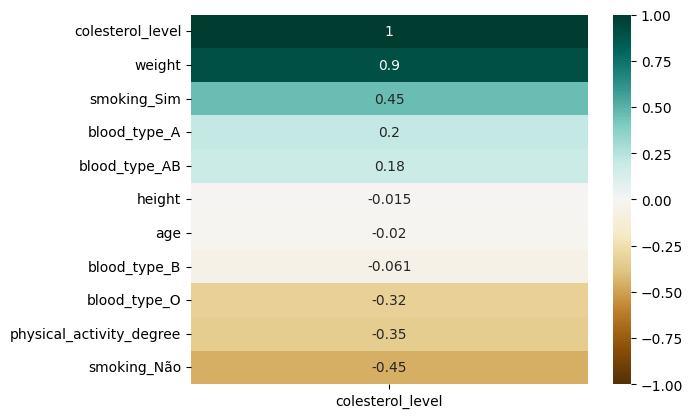

In [41]:
# Formato ranking, mostrar somente a correlação com o target (colesterol_level)
sns.heatmap(df_colesterol_eda.corr()[['colesterol_level']].sort_values(by='colesterol_level', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [42]:
# Bucketing idade
bins_age = [20, 30, 40, 50, 60, 70, 80]
labels_age = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-80']
df_colesterol_bucketing['age_scale'] = pd.cut(x=df_colesterol_bucketing['age'], bins=bins_age, labels=labels_age, include_lowest=True)

In [43]:
df_colesterol_bucketing.head(10)

,blood_type,smoking,physical_activity_degree,age,weight,height,colesterol_level,age_scale
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-80
5,B,Não,Baixo,68.0,66.8,170.0,185.31,60-69
6,A,Sim,Baixo,60.0,117.3,181.0,289.33,50-59
7,O,Sim,Moderado,35.0,86.9,174.0,216.48,30-39
8,O,Não,Baixo,62.0,81.3,166.0,235.30,60-69
9,B,Sim,Alto,44.0,32.7,165.0,97.79,40-49


<Axes: xlabel='age_scale', ylabel='colesterol_level'>

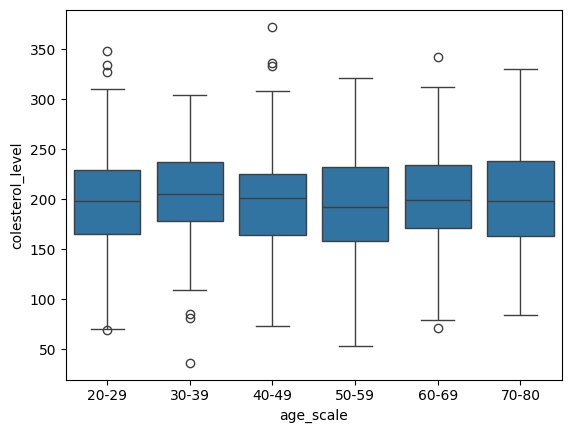

In [44]:
sns.boxplot(data=df_colesterol_bucketing, x='age_scale', y='colesterol_level')

In [45]:
# Bucketing peso
bins_weight = [40, 50, 60, 70, 80, 90, 100, 110, 120, 200]
labels_weight = ['40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110', '110-120', '120+']
df_colesterol_bucketing['weight_scale'] = pd.cut(x=df_colesterol_bucketing['weight'], bins=bins_weight, labels=labels_weight, include_lowest=True)


<Axes: xlabel='weight_scale', ylabel='colesterol_level'>

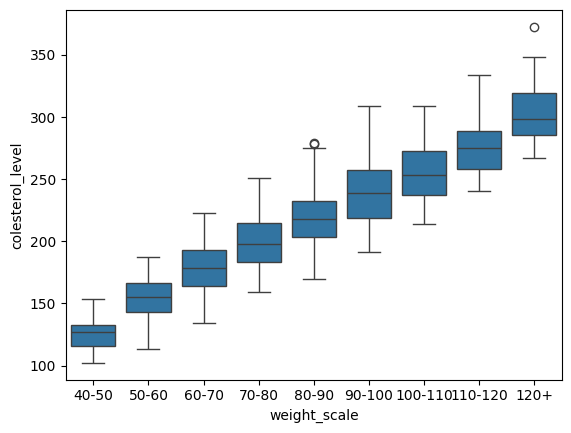

In [46]:
sns.boxplot(data=df_colesterol_bucketing, x='weight_scale', y='colesterol_level')

### Treinar modelo

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [48]:
# Criar Dataset de Treino e Teste
df_colesterol.drop(df_colesterol[df_colesterol['weight'] < 40].index, axis=0, inplace=True)

In [49]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   blood_type                960 non-null    object 
 1   smoking                   960 non-null    object 
 2   physical_activity_degree  959 non-null    object 
 3   age                       960 non-null    float64
 4   weight                    960 non-null    float64
 5   height                    960 non-null    float64
 6   colesterol_level          963 non-null    float64
dtypes: float64(4), object(3)
memory usage: 60.2+ KB


In [50]:
X = df_colesterol.drop(columns=['colesterol_level'])
y = df_colesterol['colesterol_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [51]:
X_train.shape

(674, 6)

##### Pipeline
- Imputar moda nas variáveis categóricas - blood_type, smoking, physical_activity_degree
- Padronizar variáveis numéricas (z score) - age, height, weight
- One-hot encoding para variáveis categóricas nominais - blood_type, smoking
- Ordinal encoding para variáveis categóricas ordinais - physical_activity_degree
- Imputar mediana nas variáveis numéricas - age, height, weight

In [52]:
nominal_columns = ['blood_type', 'smoking']
ordinal_columns = ['physical_activity_degree']
numerical_columns = ['age', 'height', 'weight']

In [53]:
# Pipeline: transformer
nominal_transformer = Pipeline(steps=[
    ('nominal_imputer', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore'))
])

In [54]:
ordinal_transformer = Pipeline(steps=[
    ('ordinal_imputer', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder(categories=[['Baixo', 'Moderado', 'Alto']], handle_unknown='error'))
])

In [55]:
numerical_transformer = Pipeline(steps=[
    ('numerical_imputer', SimpleImputer(strategy='median')),
    ('encode', StandardScaler())
])

In [56]:
# Criar um ColumnTransformer para encapsular todas as transformações necessárias
# Arg transformers: lista de tuplas contendo (label, transformer, colunas)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('nom', nominal_transformer, nominal_columns),
        ('ord', ordinal_transformer, ordinal_columns)
    ]
)

In [57]:
# Criando o Pipeline principal = Pré processamento + Treinamento
regression_model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]
)

In [58]:
# Treinar o modelo
regression_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('numerical_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('encode',
                                                                   StandardScaler())]),
                                                  ['age', 'height', 'weight']),
                                                 ('nom',
                                                  Pipeline(steps=[('nominal_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['blood_type', 'smoking']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordinal_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder(categories=[['Baixo',
                                                                                               'Moderado',
                                                                                               'Alto']]))]),
                                                  ['physical_activity_degree'])])),
                ('regressor', LinearRegression())])

### Análise de métricas

In [63]:
y_pred = regression_model.predict(X_test)

In [65]:
r2_score(y_test, y_pred)

0.9594250724093464

In [67]:
mean_absolute_error(y_test, y_pred)

7.313838031022503

In [72]:
mean_squared_error(y_test, y_pred, squared=False)

9.097649246487032